## Pasos para realizar una regresión lineal simple en Python

**1). Importar los siguientes módulos o paquetes:**

Éstos son necesarios para realizar la regresión lineal.

In [8]:
import pandas as pd                         # Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import matplotlib.pyplot as plt             # Permite la generación de gráficos

**2). Leer la base de datos:**

Para esto, se usará la función **read_csv** del paquete **pandas**.

In [9]:
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20simple/softdrink.csv'
dt = pd.read_csv(file)

**3). Estructura y primeras observaciones de la base de datos:**

En este paso, se debe observar el conjunto de datos importados, con el fin de familiarizarse con las características esenciales de los datos. 

In [34]:
dt.head()                  # Sirve para mostrar la parte inicial de los datos 
                           # dt.head(15) muestra las 15 primeras observaciones
                           # (Existen más funciones importantes y complementarias para ésto)

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


**4). Diagrama de dispersión:**

Éste gráfico ayuda a analizar la forma en la que dos variables numéricas están relacionadas. (Es opcional, pero útil).

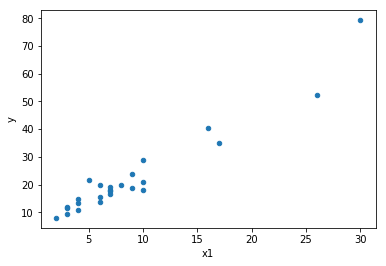

In [37]:
dt.plot(kind='scatter', x='x1', y='y');

**5). Crear el modelo de regresión:**

Para ésto, se usa **statsmodels.api**.

In [42]:
X = dt["x1"]                           # X: usualmente significa nuestras variables de entrada (o variables independientes)
X = sm.add_constant(X)                 # Se agrega una intercepción (beta_0) al modelo
y = dt["y"]                            # Y: normalmente significa la variable respuesta (o variable dependiente)

# Para encajar en el modelo

mod1 = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod1.predict(X)

**6). Resumen del modelo ajustado:**

In [45]:
mod1.summary()                         # Imprime las estadísticas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           8.22e-15
Time:                        13:15:51   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.024       0.484       6.157
x1             2.1762      0.124     17.546      0.000       1.920       2.433
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.037
Skew:                           0.388   Prob(JB):                        0.595
Kurtosis:                       3.627   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print("Los errores estándar asumen que la matriz de covarianza de los errores está correctamente especificada.")

Los errores estándar asumen que la matriz de covarianza de los errores está correctamente especificada.


**7). Ajustar el modelo por medio de fórmulas:**

Para ésto, se usa **statsmodels.formula.api**.

In [47]:
mod2 = smf.ols('y ~ x1', data=dt).fit()   # Ajusta el modelo de regresión usando el registro natural de uno de los regresores

**8). Obtener el resumen de formulas del modelo ajustado:**

In [49]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           8.22e-15
Time:                        13:21:23   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.0

**9). Agregar la recta de regresión estimada:**


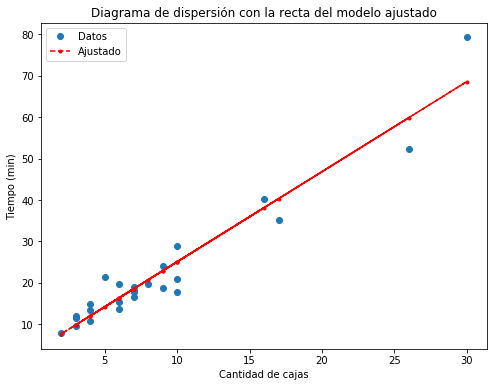

In [50]:
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(dt["x1"] , dt["y"] , 'o', label="Datos")                         # Ajuste para las etiquetas del gráfico
ax.plot(dt["x1"], mod2.fittedvalues, 'r--.', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Cantidad de cajas')                                          # Etiqueta del eje X
plt.ylabel('Tiempo (min)')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    # Título del gráfico

**Fuente:** la base de datos utilizada son del ejemplo 2.1 del libro de Montgomery, Peck and Vining (2003). Además, dicha base se encuentra alojada en el Github del profesor Freddy Hernández Barajas, https://github.com/fhernanb. 

**Documento creado por Yuberth Anderson Saavedra Coneo, durante el curso Análisis de Regresión de la Universidad Nacional de Colombia sede Medellín**.